In [1]:
import numpy as np
from numpy import random

class DLA():
    def __init__(self, N = 150, r = 10):
        #initilizes the DLA with world space N, radius on which points generate r.
        self.mass = 0
        self.N=N
        self.r = r
        self.cluster = {(N//2, N//2):True}
        self.perimeter = {(N//2,N//2):False}
        self.add_perimeter((N//2,N//2))
       
        self.world = np.zeros((N,N), dtype=np.int8)
        self.spanning = False
        
        self.north = False
        self.south = False
        self.east = False
        self.west = False
    
    def getper(self):
        #For debugging
        return self.perimeter,self.cluster
    def add_perimeter(self, pt):
        
        #Given a point pt (tuple), add to a perimeter all 4 nearest neighbors that are not already in the cluster
        if pt not in self.cluster:
            return
        nn = [(pt[0]+1,pt[1]),(pt[0]-1,pt[1]),(pt[0],pt[1]+1),(pt[0],pt[1]-1)]
        for p in nn:
            #puts items in perimeter and checks if the tree touches the defined radius
            if p not in self.cluster and p not in self.perimeter:
                if p[0] > self.N//2 + self.r:
                    self.east = True
                    
                if p[0] < self.N//2 - self.r:
                    self.west = True
                                     
                if p[1] > self.N//2 +self.r:
                    self.south = True
                       
                if p[1] < self.N//2 - self.r:
                    self.north = True
                    

                self.perimeter[p] = True
                
                
    def add_point(self):
        #To skip if we go out of the world
        miss = False
        
        #for random points outside of r
        neg = random.randint(2)
        neg2 = random.randint(2)
        
        x = random.randint(self.r, self.N//2-1) 
        y = random.randint(self.r, self.N//2-1)

        if neg == 0:
            x = x + self.N//2
        else:
            x = -x + self.N//2
        if neg2 == 0:
            y = y + self.N//2
        else:
            y = -y + self.N//2
        
        cur_index = np.array([x,y])
        index = tuple(cur_index)
        
        #While look until we hit a point in the perimeter 
        while(index not in self.perimeter):
            direction = random.randint(4)

            x = 0
            y = 0
            if direction == 0:
                y = 1
            if direction == 1:
                y = -1
            if direction == 2:
                x = 1
                y = 1
            if direction == 3:
                x = 1
                y = -1
            cur_index[x] = cur_index[x] + y

            if cur_index[0] > self.N - 1 or cur_index[1] > self.N - 1:
                miss = True
                break
            if cur_index[0] < 0 or cur_index[1] < 0:
                miss = True
                break
            index = tuple(cur_index)
            
        if miss:
            #if we go off the board returns and goes on to next point generation
            return
        
        #"Sticking" to the cluster 
        self.cluster[index] = True
        #Removing the added index from the perimeter
        self.perimeter[index] = False
        #Add new perimeter based on the stuck point
        self.add_perimeter(index)
        #number of points stuck 
        self.mass = self.mass + 1
        
        
    def span(self):
        if (self.north and self.south) or (self.east and self.west):
            self.spanning = True
        return self.spanning    
    
    
    def grow_tree(self):
        while self.span() == False:
            self.add_point()
            
    def make_World(self):
        for key, value in self.cluster.items():
            if value == True:
                self.world[key[0]][key[1]] = 1
        return self.world                
            

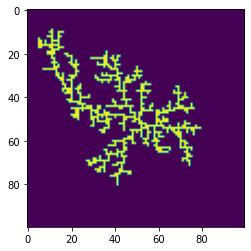

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DLA_Tree = DLA(N=100, r=30)

DLA_Tree.grow_tree()


world = DLA_Tree.make_World()

img = world

imgplot = plt.imshow(img)